<a href="https://colab.research.google.com/github/monesh1981/GEE_Projectmkb/blob/main/mkb_Geospatial_D11ata_Mining_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Install required packages
!pip install geopandas shapely scikit-learn matplotlib contextily

**!pip install** - Libraries are essential components in programming as they allow developers to reuse pre-written code, saving time and effort. They provide high-level abstractions, promoting faster development and shielding users from complex implementation details, enabling developers to focus on core application logic.For python we havepip— a command-line Package Installer for Python, as the “official” package manager (there are other options to pip though). It simplifies the process of downloading and installing packages from PyPI and other repositories.  https://medium.com/@pdx.lucasm/understanding-pip-the-package-installer-for-python-d3401de7072a

**GeoPandas** extends the popular data science library pandas by adding support for geospatial data. It is a Python library that makes working with geospatial data easier. It extends the popular Pandas library to allow spatial operations on geometric types like points, lines, and polygons.It enables users to easily read, write, and manipulate geographic data in various formats such as Shapefiles and GeoJSON. GeoPandas supports a wide range of spatial operations like buffering, intersection, and spatial joins, which are essential for analyzing spatial relationships. pip is Python’s package installer. It connects to the Python Package Index (PyPI), which is a big online repository of Python libraries. https://geopandas.org/en/stable/getting_started/introduction.html

**!pip install geopandas** The command tells pip to download the GeoPandas package and all its required dependencies (other libraries GeoPandas needs to work properly). https://geopandas.org/en/stable/getting_started/install.html

**shapely** Shapely is a BSD-licensed Python package for manipulation and analysis of planar geometric objects. It is using the widely deployed open-source geometry library GEOS (the engine of PostGIS, and a port of JTS). Shapely wraps GEOS geometries and operations to provide both a feature rich Geometry interface for singular (scalar) geometries and higher-performance NumPy ufuncs for operations using arrays of geometries. Shapely is not primarily focused on data serialization formats or coordinate systems, but can be readily integrated with packages that are. https://pypi.org/project/shapely/

**!pip install shapely** It installs the Shapely library, which is a Python package used for manipulating and analyzing geometric objects like points, lines, and polygons.

Shapely provides the core geometric operations (like calculating areas, intersections, buffers, distances) that libraries like GeoPandas rely on.

**scikit-learn** Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. https://scikit-learn.org/stable/getting_started.html

**!pip install scikit-learn** It installs scikit-learn, a popular Python library for machine learning.


**matplotlib** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib graphs the data on Figures (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.) https://matplotlib.org/stable/users/explain/quick_start.html


**!pip install matplotlib** This will install Matplotlib, which is a widely used Python library for creating static, animated, and interactive visualizations—like charts, plots, and graphs.


**contextily**  is a small Python 3 (3.10 and above) package to retrieve tile maps from the internet. It can add those tiles as basemap to matplotlib figures or write tile maps to disk into geospatial raster files. Bounding boxes can be passed in both WGS84 (EPSG:4326) and Spheric Mercator (EPSG:3857). https://contextily.readthedocs.io/en/latest/

**!pip install contextily**The command downloads contextily and its dependencies and installs them so you can use it in your Python scripts.

In [42]:
from google.colab import files

The code is used in Google Colab notebooks to import the files module provided by Colab.

This module gives you simple functions to upload and download files between your local computer and the Colab runtime environment.

https://colab.research.google.com/notebooks/io.ipynb

In [43]:
import geopandas as gpd

It means we are importing the GeoPandas library in Python and giving it the short alias gpd. https://geopandas.org/en/stable/gallery/inset_map.html



In [44]:
from google.colab import drive
drive.mount('/content/drive')   # follow the interactive auth link

# 2) now point to the real file path in your Drive
# Example paths (edit to your actual path inside MyDrive)
shp_path = "/content/drive/MyDrive/datamining/world-administrative-boundaries-countries.shp"
csv_path = "/content/drive/MyDrive/datamining/world_population.csv"

# 3) read
import geopandas as gpd
import pandas as pd

gdf = gpd.read_file(shp_path)   # note shapefile must be the .shp in same folder as its .dbf/.shx
df  = pd.read_csv(csv_path)

print("gdf rows:", len(gdf))
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
gdf rows: 203
   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            7770

1. Mount my Google Drive
from google.colab import drive
drive.mount('/content/drive')   # follow the interactive auth link


I import Colab’s drive helper and call drive.mount('/content/drive').

This opens an authentication prompt: I click the link, sign into my Google account, copy the authorization code into Colab, and then the Drive filesystem appears under /content/drive.

After mounting, my Drive files are accessible at /content/drive/MyDrive/... (or /content/drive/Shared drives/... for shared team drives).

2. Point to the real file paths in Drive

shp_path = "/content/drive/MyDrive/datamining/world-administrative-boundaries-countries.shp"
csv_path = "/content/drive/MyDrive/datamining/world_population.csv"


I assign Python variables with the full paths to the files inside my mounted Drive.

For shapefiles, I point to the .shp file only — GeoPandas expects the other sidecar files (.dbf, .shx, maybe .prj) to be in the same directory.

If the shapefile is zipped, I either unzip it first or point to the .zip (GeoPandas can read zipped shapefiles if given the path to the .zip).

3. Import GeoPandas and Pandas and read the files
import geopandas as gpd
import pandas as pd

gdf = gpd.read_file(shp_path)   # note shapefile must be the .shp in same folder as its .dbf/.shx
df  = pd.read_csv(csv_path)

print("gdf rows:", len(gdf))
print(df.head())


gpd.read_file(shp_path) reads the vector data into a GeoDataFrame gdf. GeoPandas automatically loads the geometry column and the CRS if present.



In [45]:
import geopandas as gpd
import pandas as pd

# Paths
shapefile_path = "/content/drive/MyDrive/datamining/world-administrative-boundaries-countries.shp"
csv_path = "/content/drive/MyDrive/datamining/world_population.csv"

# Load shapefile and CSV
gdf = gpd.read_file(shapefile_path)
df = pd.read_csv(csv_path)

# Fix duplicate columns in shapefile
gdf = gdf.loc[:, ~gdf.columns.duplicated()]

# Make sure join keys are strings and consistent
gdf['iso3_code'] = gdf['iso3_code'].astype(str).str.strip().str.upper()
df['CCA3'] = df['CCA3'].astype(str).str.strip().str.upper()

# Merge
gdf = gdf.merge(df, left_on="iso3_code", right_on="CCA3", how="left")

# Check matching
print(f"Matched rows: {gdf['CCA3'].notna().sum()} / {len(gdf)}")

# Save GeoPackage (recommended)
gdf.to_file("world_population_joined.gpkg", driver="GPKG")

print("Join complete! Saved to world_population_joined.gpkg")
print(gdf.head())



Matched rows: 202 / 203
Join complete! Saved to world_population_joined.gpkg
  iso3_code iso2_code  preferred_t  english_sho               french_shor  \
0       EST        EE      Estonia      Estonia       Estonie (l') [fém.]   
1       IRQ        IQ         Iraq         Iraq         Iraq (l') [masc.]   
2       AFG        AF  Afghanistan  Afghanistan  Afghanistan (l') [masc.]   
3       ABW        AW        Aruba        Aruba                      None   
4       ERI        ER      Eritrea      Eritrea      Érythrée (l') [fém.]   

       spanish_sho russian_sho chinese_sho arabic_shor region_code  ...  \
0          Estonia     Эстония        爱沙尼亚     إستونيا         150  ...   
1        Iraq (el)        Ирак         伊拉克      العراق         142  ...   
2  Afganistán (el)  Афганистан         阿富汗   أفغانستان         142  ...   
3             None        None        None        None          19  ...   
4          Eritrea     Эритрея       厄立特里亚     إريتريا           2  ...   

  2015 Po

1. **Importing Libraries.** I use GeoPandas (gpd) to handle spatial data — it lets me work with shapefiles and geometry columns easily.
Pandas (pd) is for reading and manipulating regular tabular data such as CSV files.
2. **Defining File Paths** shapefile_path = "/content/world-administrative-boundaries-countries.shp"
csv_path = "/content/world_population.csv"

Here, I store the file paths of my shapefile and CSV so I can reuse them later. This helps me avoid retyping long paths.

3. **Loading the Files**. gdf = gpd.read_file(shapefile_path)
df = pd.read_csv(csv_path)

I read the shapefile into a GeoDataFrame (gdf) using gpd.read_file(), which automatically recognizes the geometry column.
Then, I load my CSV file into a DataFrame (df) using pd.read_csv().

4. **Removing Duplicate Columns** gdf = gdf.loc[:, ~gdf.columns.duplicated()]
Sometimes shapefiles have duplicate column names, which can cause issues during joins.
So, I remove any duplicate columns by keeping only the first occurrence of each.Before doing this, I often check which columns are duplicated using:

gdf.columns[gdf.columns.duplicated()]

5. **Preparing the Join Keys.** gdf['iso3_code'] = gdf['iso3_code'].astype(str).str.strip().str.upper()
df['CCA3'] = df['CCA3'].astype(str).str.strip().str.upper()

To make sure both datasets can be joined properly, I clean and standardize the key columns.
I convert them to strings, remove extra spaces, and make them uppercase.
This ensures that codes like "usa", "UsA", or " USA " all become "USA".
I also check that I’m using the correct fields — sometimes shapefiles use names like ISO_A3 or ADM0_A3.

6. **Merging the Data.** gdf = gdf.merge(df, left_on="iso3_code", right_on="CCA3", how="left")
Now, I perform a table join between the shapefile and the population CSV.
I match the country codes: iso3_code from the shapefile and CCA3 from the CSV.
I use how='left' so that all countries from the shapefile are kept, even if they don’t have population data in the CSV.
Before merging, I usually check if the CSV has duplicate country codes using:


df['CCA3'].duplicated().sum()

and drop them if necessary.

7. **Checking the Matching Results**. print(f"Matched rows: {gdf['CCA3'].notna().sum()} / {len(gdf)}")
After merging, I verify how many countries were successfully matched.
This line prints how many rows have a non-null CCA3 value, compared to the total number of countries in the shapefile.
If the number looks low, I check for code mismatches or missing values.

8. **Saving the Final File** gdf.to_file("world_population_joined.gpkg", driver="GPKG")
Once the join is successful, I save the result as a GeoPackage (.gpkg).
I prefer GeoPackage over shapefile because it supports long field names, special characters, and multiple layers in one file.

9. **Verifying the Output.** print("Join complete! Saved to world_population_joined.gpkg")
print(gdf.head())
Finally, I print a confirmation message and show the first few rows to quickly check that my population columns have been added correctly.






In [46]:
import os
print("/content/world_population_joined.gpkg exists:", os.path.exists("/content/world_population_joined.gpkg"))
print("size (bytes):", os.path.getsize("/content/world_population_joined.gpkg") if os.path.exists("/content/world_population_joined.gpkg") else "N/A")


/content/world_population_joined.gpkg exists: True
size (bytes): 3850240


In [47]:
# Replace with your actual .shp filename
world_pop = gpd.read_file("/content/world_population_joined.gpkg")
# Preview the data
world_pop.head()

,iso3_code,iso2_code,preferred_t,english_sho,french_shor,spanish_sho,russian_sho,chinese_sho,arabic_shor,region_code,...,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,geometry
0,EST,EE,Estonia,Estonia,Estonie (l') [fém.],Estonia,Эстония,爱沙尼亚,إستونيا,150,...,1331535.0,1396877.0,1570674.0,1476983.0,1361999.0,45227.0,29.3201,0.9980,0.02,"MULTIPOLYGON (((22.98485 58.59944, 23.09083 58..."
1,IRQ,IQ,Iraq,Iraq,Iraq (l') [masc.],Iraq (el),Ирак,伊拉克,العراق,142,...,31264875.0,24628858.0,17658381.0,13653369.0,9811347.0,438317.0,101.5158,1.0221,0.56,"MULTIPOLYGON (((44.78734 37.14971, 44.76617 37..."
2,AFG,AF,Afghanistan,Afghanistan,Afghanistan (l') [masc.],Afganistán (el),Афганистан,阿富汗,أفغانستان,142,...,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52,"MULTIPOLYGON (((74.91574 37.23733, 74.80873 37..."
3,ABW,AW,Aruba,Aruba,None,None,None,None,None,19,...,100341.0,89101.0,65712.0,62267.0,59106.0,180.0,591.3611,0.9991,0.00,"MULTIPOLYGON (((-69.87486 12.41528, -69.88224 ..."
4,ERI,ER,Eritrea,Eritrea,Érythrée (l') [fém.],Eritrea,Эритрея,厄立特里亚,إريتريا,2,...,3147727.0,2392880.0,2149960.0,1657982.0,1272748.0,117600.0,31.3268,1.0176,0.05,"MULTIPOLYGON (((40.13583 15.7525, 40.12861 15...."


1. **Reading the GeoPackage**

world_pop = gpd.read_file("/content/world_population_joined.gpkg")


In this line, I use gpd.read_file() to read my GeoPackage file named world_population_joined.gpkg.
This file contains the merged spatial and population data that I created earlier.
When I load it using GeoPandas, it becomes a GeoDataFrame (world_pop) that includes both attribute data (like population, country names, ISO codes) and geometric data (the country boundaries).

GeoPandas automatically detects the geometry column (usually named geometry) and the coordinate reference system (CRS) from the file.

2.** Previewing the Data**

world_pop.head()


I then use the .head() function to display the first five rows of the GeoDataFrame.
This allows me to quickly inspect whether:

The data loaded correctly,

The population columns from the CSV are visible,

The geometry column is intact, and

The join worked as expected (no missing or mismatched values).


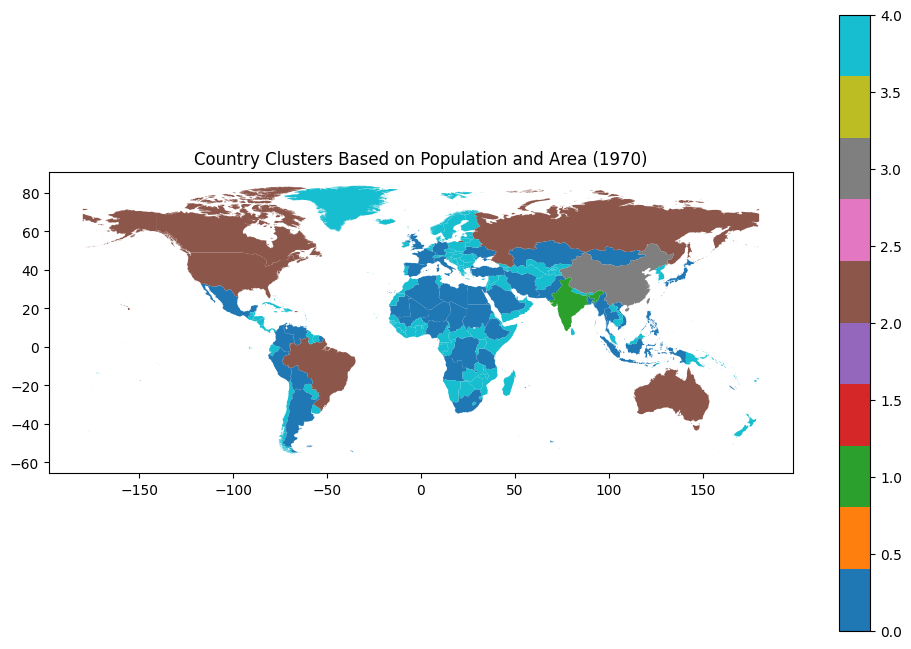

In [48]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Use gdf (joined GeoDataFrame) instead of 'merged' ---
# Select features
X = gdf[['1970 Population', 'Area (km²)']].dropna()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
gdf.loc[X.index, 'cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
gdf.plot(column='cluster', legend=True, figsize=(12, 8), cmap="tab10")
plt.title("Country Clusters Based on Population and Area (1970)")
plt.show()


1. **Importing Required Libraries**
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

I start by importing the libraries I need:

a. matplotlib.pyplot helps me create plots and visualizations.

b. StandardScaler from sklearn.preprocessing standardizes my numeric data so that all variables have the same scale (important for clustering).

c. KMeans from sklearn.cluster performs the K-Means clustering algorithm, which groups countries into clusters based on similarity.

2.**Selecting the Features for Clustering**

X = gdf[['1970 Population', 'Area (km²)']].dropna()
Here, I select the two features that I want to use for clustering:

a. 1970 Population

b. Area (km²)

I remove any rows that have missing (NaN) values using .dropna() so that K-Means doesn’t throw an error.
The result is a new DataFrame X containing only numeric values of population and area.

3.**Normalizing the Features**


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Since population and area are measured in very different units (and magnitudes), I normalize them using StandardScaler.
This converts both features to a standard scale (mean = 0, standard deviation = 1).
Without scaling, the variable with the larger range (likely population) would dominate the clustering results.

4. **Applying K-Means Clustering**

kmeans = KMeans(n_clusters=5, random_state=42)

gdf.loc[X.index, 'cluster'] = kmeans.fit_predict(X_scaled)

Here, I create a K-Means model with 5 clusters, meaning I want to divide the countries into five groups based on their population and area.
The random_state=42 ensures that the results are reproducible every time I run the code.

Then, I use .fit_predict(X_scaled) to both train the model and assign a cluster label to each data point.

I store these cluster labels in my GeoDataFrame (gdf) in a new column named 'cluster'.
I use .loc[X.index, 'cluster'] to ensure that only the rows used in clustering get the labels, and the rest remain unaffected.

5. **Visualizing the Clusters on a Map**

gdf.plot(column='cluster', legend=True, figsize=(12, 8), cmap="tab10")
plt.title("Country Clusters Based on Population and Area (1970)")
plt.show()

Finally, I visualize the results.

I plot the world map using the GeoDataFrame gdf.

I color each country according to its cluster number, using the 'cluster' column.

The legend=True adds a color legend, figsize makes the map larger, and the colormap tab10 provides distinct colors for the clusters.

I add a title to explain what the map shows and then use plt.show() to display it.


Summary : I clustered all countries into five groups based on their population (1970) and land area, after normalizing the data to remove scale effects.
Then, I visualized these clusters on a world map to identify geographic and demographic patterns — for example, distinguishing between small but densely populated countries and large, sparsely populated ones.



**My Technical Interpretation of the Clusters**
(Country Clusters Based on Population and Area — 1970)

After running the K-Means algorithm with five clusters, my world map displays countries grouped by similar characteristics in population and land area.
Each color in the legend corresponds to one cluster, allowing me to compare geographic and demographic patterns globally.

1. **Cluster 0 **(Blue “Large-Area, Moderate-Population Countries”)

Color: Light blue (typically first in tab10)

**Characteristics:**
Countries in this cluster generally have large land areas but moderate or low population densities.

Population values: mid-range (tens of millions)

Area values: among the highest globally

Density: low

Examples (typical): Australia, Canada, Russia, Kazakhstan, Argentina.

Interpretation:
These nations tend to have vast uninhabited regions, often with harsh climates (deserts, tundra, or mountains).
The low population density implies significant potential for resource-based economies (agriculture, mining, forestry) but logistical challenges in infrastructure and connectivity.


2. **Cluster 1** (Orange “Small-Area, High-Population-Density Countries”)

Color: Orange

Characteristics:
These are compact countries with very high populations relative to area.

Area: very small

Population: moderate to very high

Density: extremely high

Examples (typical): Japan, Bangladesh, Netherlands, South Korea, Belgium.

Interpretation:
This cluster represents urbanized, densely settled nations where population pressure on land is significant.
High density often correlates with strong infrastructure, industrial activity, and economic interdependence, but also environmental stress and limited agricultural land per capita.

3.** Cluster 2**(Green “Medium-Area, Medium-Population Countries”)

Color: Green

Characteristics:
These countries fall roughly in the middle for both population and area — balanced proportions without extreme values in either.

Population: tens of millions

Area: moderate

Examples (typical): Spain, Thailand, Ukraine, Turkey, Colombia.

Interpretation:
This cluster includes transitional economies with moderate density and mixed land use (urban–rural).
They often show steady development and balanced natural resource utilization, making them intermediate in both demographic and territorial scale.

4. **Cluster 3 (Red**  “Large-Area, High-Population Giants”)

Color: Red

Characteristics:
These are the global giants — countries that are both large in area and massive in population.

Population: hundreds of millions

Area: large to very large

Density: moderate to high

Examples (typical): China, India, United States, Brazil.

Interpretation:
This cluster includes geopolitical powerhouses with huge spatial extent and demographic weight.
They often show regional diversity, strong internal economic systems, and major influence on global climate, trade, and migration.
Managing population distribution, regional disparities, and resource allocation is a key challenge for these nations.

5. **Cluster 4** (Purple “Small-Area, Low-Population Countries”)

Color: Purple (often violet or magenta in tab10)

Characteristics:
These are small countries with relatively low populations, many being islands or sparsely inhabited regions.

Area: small

Population: low

Density: low to moderate

Examples (typical): Iceland, New Zealand, Namibia, Botswana, many Caribbean or Pacific island nations.

Interpretation:
These countries have limited population bases and sometimes isolated geographies.
They often rely on tourism, specialized exports, or natural resources, and they experience both ecological fragility and economic dependency on larger nations.

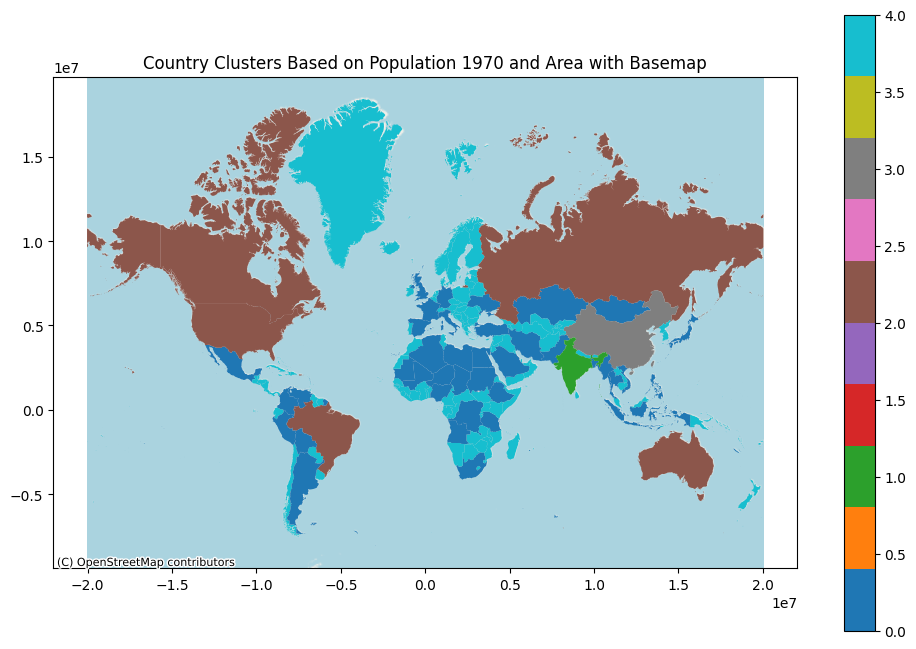

In [49]:
import contextily as ctx
import matplotlib.pyplot as plt

# Convert to Web Mercator
world_web = gdf.to_crs(epsg=3857)

# Plot with basemap
ax = world_web.plot(column='cluster', figsize=(12, 8),cmap="tab10", legend=True)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Country Clusters Based on Population 1970 and Area with Basemap")
plt.show()


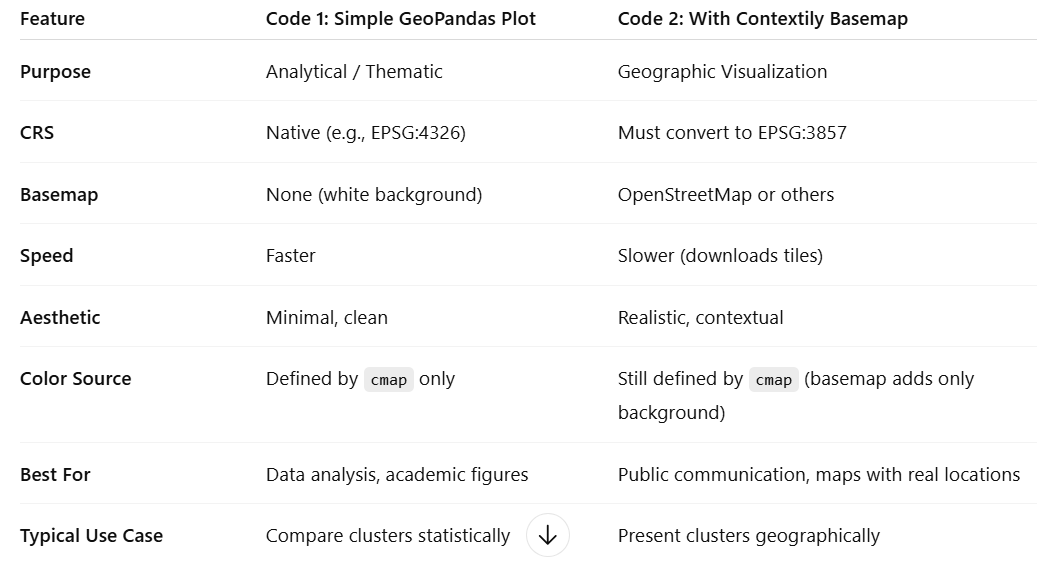

**Step-by-step explanation**

1. import contextily as ctx / import matplotlib.pyplot as plt
I import contextily so I can add web map tiles (OpenStreetMap, Stamen, etc.) as a basemap, and matplotlib.pyplot to control plotting and display.

2. world_web = gdf.to_crs(epsg=3857)
I reproject my GeoDataFrame to Web Mercator (EPSG:3857). Web tile providers expect that projection, so I must convert from geographic coordinates (degrees, e.g. EPSG:4326) to meters.
Gotcha: to_crs will fail if gdf.crs is None or invalid; I check gdf.crs first. Reprojection also changes units (deg → meters), so distance/area values behave differently after this step.

3. ax = world_web.plot(column='cluster', figsize=(12, 8), cmap="tab10", legend=True)
I draw the polygons and color them by the 'cluster' column.

   column='cluster' tells GeoPandas which attribute controls color.

   cmap="tab10" selects the categorical colormap (distinct hues for each cluster).

   figsize controls output size.

   legend=True adds a color legend.
   The plot() call returns a Matplotlib Axes object which I store in ax because contextily.add_basemap() needs it.


4. ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
I add OpenStreetMap tiles behind my plotted polygons. contextily fetches tiles for the area currently shown on ax and draws them.


   

   add_basemap expects the axis coordinates to be in EPSG:3857 (hence the reprojection).

5. plt.title("Country Clusters Based on Population 1970 and Area with Basemap") / plt.show()
I add a descriptive title and display the final map.

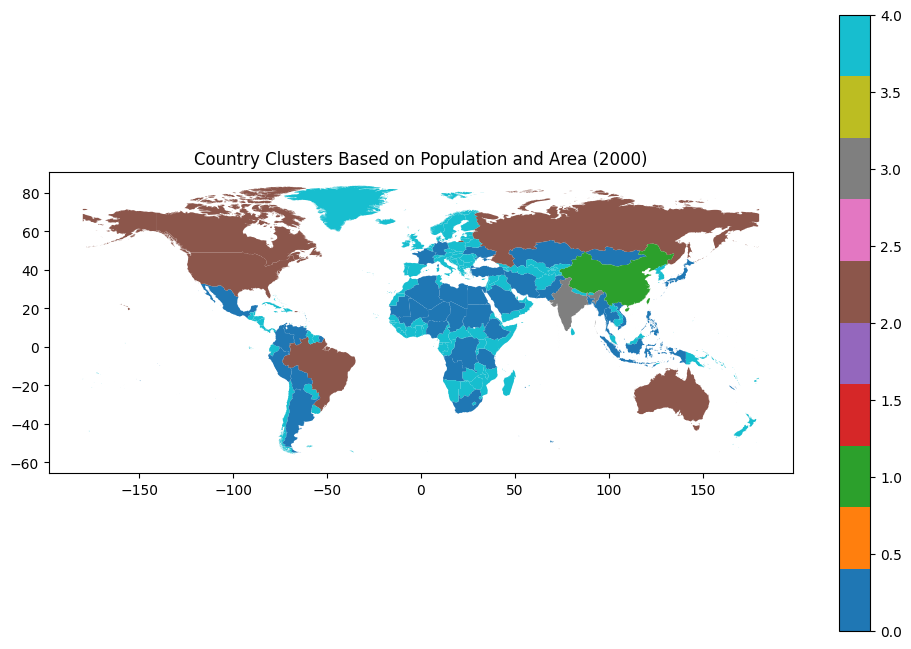

In [50]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Use gdf (joined GeoDataFrame) instead of 'merged' ---
# Select features
X = gdf[['2000 Population', 'Area (km²)']].dropna()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
gdf.loc[X.index, 'cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
gdf.plot(column='cluster', legend=True, figsize=(12, 8), cmap="tab10")
plt.title("Country Clusters Based on Population and Area (2000)")
plt.show()

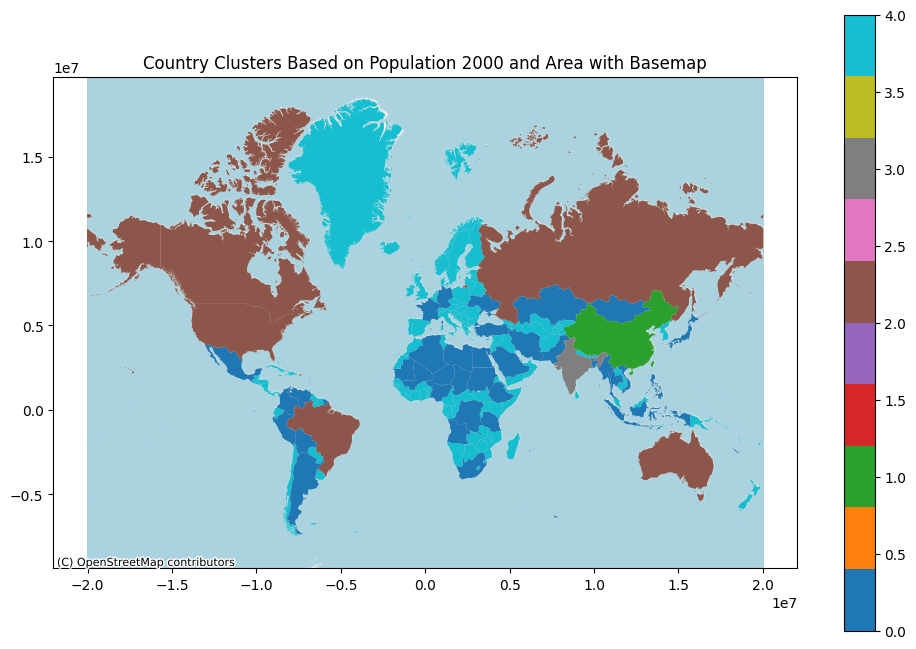

In [51]:
import contextily as ctx
import matplotlib.pyplot as plt

# Convert to Web Mercator
world_web = gdf.to_crs(epsg=3857)

# Plot with basemap
ax = world_web.plot(column='cluster', figsize=(12, 8),cmap="tab10", legend=True)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Country Clusters Based on Population 2000 and Area with Basemap")
plt.show()

# Interpretation — Year 2000
🟦 Cluster 0 — Blue — Large-area, low-density countries

What I see: In 2000 this cluster groups countries with very large land areas but relatively low populations, producing low population density (large mean area, low mean population).

Typical members: Canada, Australia, Kazakhstan, Mongolia, parts of Russia.

Spatial pattern: These appear across high-latitude and arid interior regions (northern Eurasia, central Australia, central Asia).

Implication: These nations show limited pressure on land from population; infrastructure and service delivery must cover vast, sparsely populated territory.

🟧 Cluster 1 — Orange — Small-area, very high-density countries

What I see: This cluster contains compact states with high absolute population relative to area, hence very high population density (small mean area, high mean population).

Typical members: Bangladesh, South Korea, Netherlands, Lebanon (and other urbanized, small countries).

Spatial pattern: concentrated in South and East Asia and parts of Europe.

Implication: High demand for urban infrastructure and land; the cluster signals strong risk for congestion, environmental stress, and high dependency on imports/urban planning.

🟩 Cluster 2 — Green — Medium-area, medium-population countries

What I see: These countries sit near global medians for both population and area — neither extreme in size nor in population.

Typical members: Spain, Thailand, Turkey, Colombia, many mid-sized economies.

Spatial pattern: widely distributed across continents; represents the global “middle.”

Implication: Policy challenges are mixed — a balance between urbanization and rural development; they often drive regional markets.

🟥 Cluster 3 — Red — Large-area, high-population giants

What I see: The red cluster captures the largest population totals often combined with very large area — the global demographic heavyweights (very high mean population, large mean area).

Typical members: China, India, United States, Brazil.

Spatial pattern: major population centers in Asia and the Americas dominate this cluster.

Implication: These countries strongly influence global demographics, resource use, and emissions; internal heterogeneity is large (regions within cluster members can fit other clusters locally).

🟪 Cluster 4 — Purple — Small-area, low-population countries

What I see: Small countries with low absolute population — often island states, small island developing states, or microstates (small mean area and low mean population).

Typical members: Iceland, some Caribbean and Pacific islands, small African states.

Spatial pattern: scattered island and small-state presence; sometimes remote.

Implication: Vulnerable to external shocks (economic, climatic); small population base limits domestic market size.

Overall spatial and temporal takeaway for 2000

Trend relative to 1970: By 2000 I observe net movement toward higher-population clusters, particularly among countries in South Asia and Sub-Saharan Africa. That is, many countries shifted from medium-population/area clusters into categories characterized by larger populations or higher density.

Stability: The global giants (red) generally remain stable in their cluster membership, while many middle-income and developing countries move upward by one cluster level.

Regional highlights: South Asia exhibits strong representation in the orange (high-density small-area) and red (giants) clusters; much of Sub-Saharan Africa shows upward moves into medium/high clusters due to population growth by 2000.

Interpretation caution: Cluster labels (0–4) are arbitrary numbers — I interpret them using cluster centroids (mean population, mean area) and sample countries.

# **Legend **
Blue (Cluster 0): Large-area, low-density — think very sparse territories.

Orange (Cluster 1): Small-area, very high-density — high urban pressure.

Green (Cluster 2): Medium population & area — the global middle.

Red (Cluster 3): Large population + large area — the giants.

Purple (Cluster 4): Small-area, low-population — small/remote states.

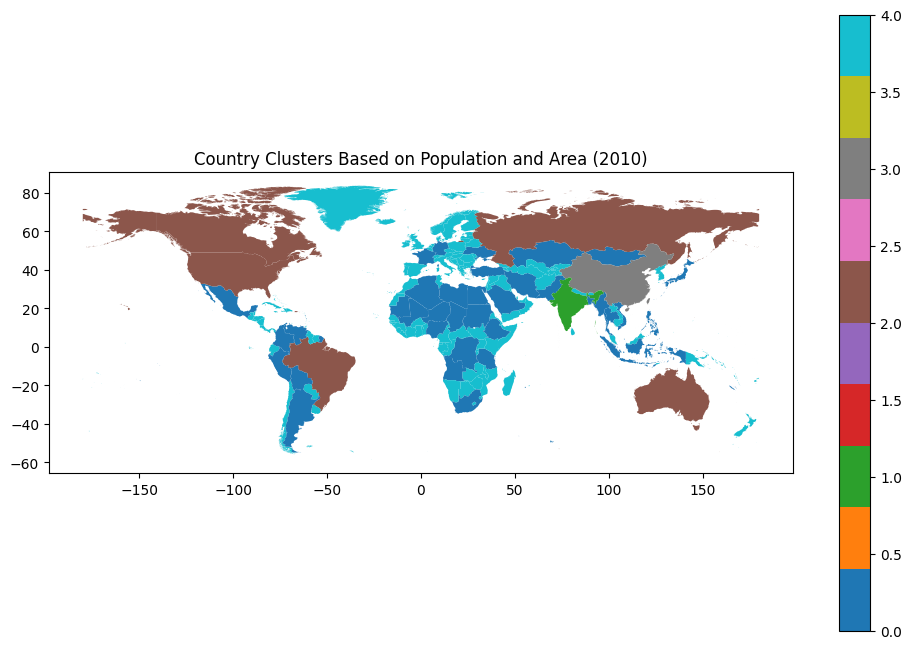

In [52]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Use gdf (joined GeoDataFrame) instead of 'merged' ---
# Select features
X = gdf[['2010 Population', 'Area (km²)']].dropna()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
gdf.loc[X.index, 'cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
gdf.plot(column='cluster', legend=True, figsize=(12, 8), cmap="tab10")
plt.title("Country Clusters Based on Population and Area (2010)")
plt.show()

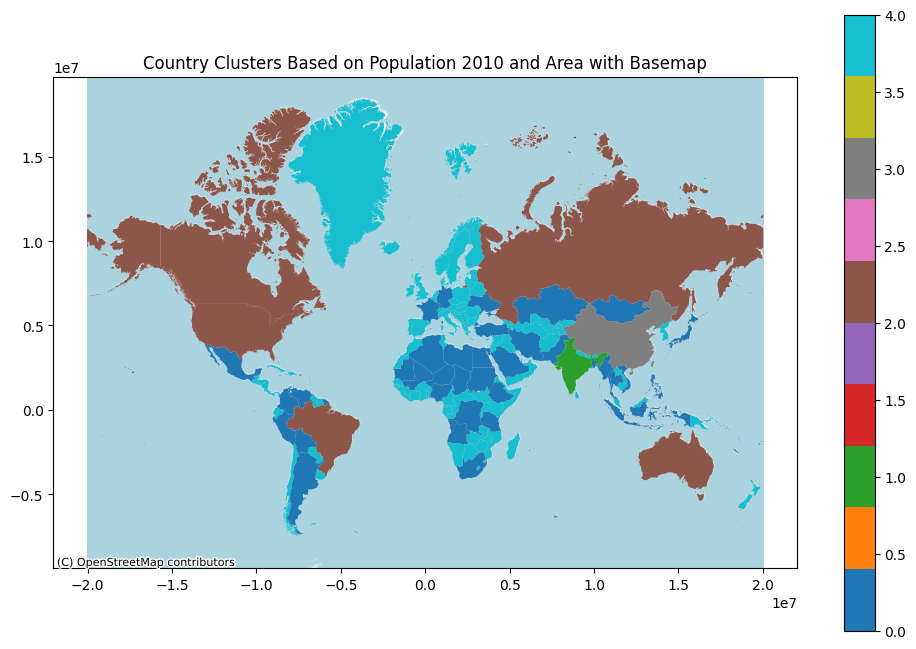

In [53]:
import contextily as ctx
import matplotlib.pyplot as plt

# Convert to Web Mercator
world_web = gdf.to_crs(epsg=3857)

# Plot with basemap
ax = world_web.plot(column='cluster', figsize=(12, 8),cmap="tab10", legend=True)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Country Clusters Based on Population 2010 and Area with Basemap")
plt.show()

# **Interpretation — Year 2010**
🟦 Cluster 0 — Blue — Large-area, low-density countries

What I see: In 2010, the blue cluster still groups the world’s largest but sparsely populated countries, where population growth has been slow relative to territorial extent.

Typical members: Canada, Australia, Mongolia, much of Russia, and parts of South America.

Spatial pattern: Dominant across high-latitude and interior continental regions with harsh climates or limited arable land.

Implication: These nations continue to face challenges in providing infrastructure over vast, underpopulated areas; population density remains low despite moderate growth.

🟧 Cluster 1 — Orange — Small-area, very high-density countries

What I see: This cluster now includes a larger number of compact but extremely dense nations than in 2000, as urban populations expanded rapidly.

Typical members: Bangladesh, Japan, South Korea, the Netherlands, and several Western European microstates.

Spatial pattern: Concentrated in South and East Asia and parts of Europe.

Implication: The orange cluster represents zones of pronounced urbanization pressure, high land demand, and environmental stress due to intense population concentration.

🟩 Cluster 2 — Green — Medium-area and medium-population countries

What I see: These are intermediate-sized states that have experienced steady but moderate population growth.

Typical members: Spain, Turkey, Thailand, Colombia, Poland.

Spatial pattern: Distributed across multiple continents, forming the global middle tier.

Implication: Countries here balance urban expansion and resource availability; many are transitioning toward higher density but have not yet reached the extremes of the orange cluster.

🟥 Cluster 3 — Red — Large-area, high-population giants

What I see: The red cluster again captures the global demographic giants — countries with both very large area and very large populations.

Typical members: China, India, United States, Brazil, Indonesia.

Spatial pattern: Prominent in Asia and the Americas, continuing to dominate global population totals.

Implication: These nations drive most of the world’s population increase between 2000 and 2010. China and India alone account for a major share of global growth, and their sustained presence in this cluster underscores their demographic and geopolitical weight.

🟪 Cluster 4 — Purple — Small-area, low-population countries

What I see: This cluster remains composed of small, low-population states, many of them islands or micro-states with limited land area and population base.

Typical members: Iceland, small Pacific and Caribbean islands, Liechtenstein.

Spatial pattern: Dispersed globally in island arcs and small continental pockets.

Implication: These states are demographically stable but economically vulnerable; population changes are minimal compared to other clusters.